In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json                     #permissions

In [ ]:
!kaggle datasets download -d muhammeddalkran/catvnoncat

  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 103MB/s]


In [ ]:
 !unzip /content/catvnoncat.zip


Archive:  /content/catvnoncat.zip
  inflating: catvnoncat/test_catvnoncat.h5  
  inflating: catvnoncat/train_catvnoncat.h5  


In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

LOAD DATA

In [ ]:
train_dataset = h5py.File('/content/catvnoncat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/catvnoncat/test_catvnoncat.h5', "r")

CONVERT H5PY DATA INTO NUMPYDATA

In [ ]:
#train set features
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # features
#train set labels
train_set_y = np.array(train_dataset["train_set_y"][:]) #labels

In [ ]:
#test set features
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # features
#test set labels
test_set_y = np.array(test_dataset["test_set_y"][:]) # labels

In [ ]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [ ]:
print(test_set_x_orig.shape)
print(test_set_y.shape)

(50, 64, 64, 3)
(50,)


TRAINING DATA






In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
y = train_set_y.reshape((1,train_set_y.shape[0]))
X = train_set_x_flatten/255


TESTING DATA





In [ ]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
y_test = test_set_y.reshape((1,test_set_y.shape[0]))
X_test = test_set_x_flatten/255

In [ ]:
nx,m_train = X.shape
nh=4
ny=y.shape[0]   #size of output layer

In [ ]:
np.random.seed(2)

W1=np.random.randn(nh,nx)*0.01
b1=np.zeros(shape=(nh,1))
W2=np.random.randn(ny,nh)*0.01
b2=np.zeros(shape=(ny,1))


In [ ]:
assert(W1.shape == (nh,nx))
assert(b1.shape == (nh,1))
assert(W2.shape == (ny,nh))
assert(b2.shape == (ny,1))

In [ ]:
Z1=np.dot(W1,X) + b1
A1=np.tanh(Z1)
Z2=np.dot(W2,A1) + b2
A2=1/(1+np.exp(-Z2))


In [ ]:
assert(A2.shape == (1,X.shape[1]))

In [ ]:
cost = -np.sum(np.multiply(np.log(A2),y) + np.multiply((1-y), np.log(1-A2))) / m_train
print(cost)

0.6951399413442905


In [ ]:
dZ2= A2-y
dW2= (1/m_train) * np.dot(dZ2, A1.T)
db2= (1/m_train) * np.sum(dZ2, axis=1, keepdims=True)
dZ1= np.multiply(np.dot(W2.T, dZ2), 1- np.power(A1,2))
dW1= (1/m_train) * np.dot(dZ1, X.T)
db1= (1/m_train) * np.sum(dZ1, axis=1, keepdims=True)



PYTHON IMPLEMENTATION

In [ ]:
learning_rate=0.005
max_iteration=3000
cost=np.zeros((max_iteration))

for i in range(max_iteration):
  #forward propagation
  Z1=np.dot(W1,X) + b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1) + b2
  A2=1/(1+np.exp(-Z2))

  #calculate cost
  cost[i]= -np.sum(np.multiply(np.log(A2),y) + np.multiply((1-y), np.log(1-A2))) /m_train

  #calculate derivatives

  #output layer
  dZ2= A2-y
  dW2= (1/m_train) * np.dot(dZ2, A1.T)
  db2= (1/m_train) * np.sum(dZ2, axis=1, keepdims=True)
  #hidden layer
  dZ1= np.multiply(np.dot(W2.T, dZ2), 1- np.power(A1,2))
  dW1= (1/m_train) * np.dot(dZ1, X.T)
  db1= (1/m_train) * np.sum(dZ1, axis=1, keepdims=True)
  #update parameters
  W1=W1-learning_rate*dW1
  b1=b1-learning_rate*db1
  W2=W2-learning_rate*dW2
  b2=b2-learning_rate*db2

print(cost[i])

0.03308132347546929


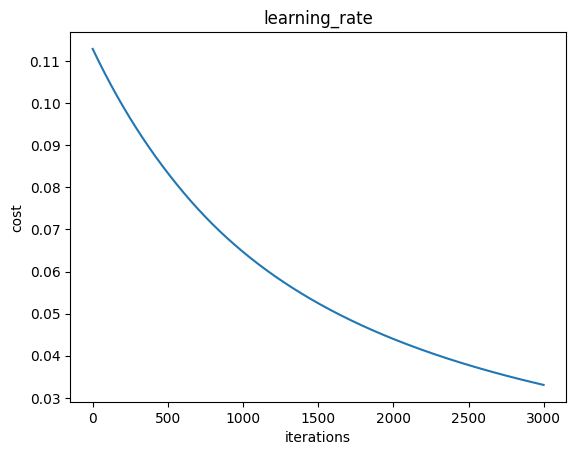

In [ ]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('learning_rate')
plt.show()

PREDICTIONS

In [ ]:
def predict(W1,W2,b1,b2,X,m):
  yhat=np.zeros((1,m))

  Z1=np.dot(W1,X) + b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1) + b2
  A2=1/(1+np.exp(-Z2))

  for i in range(m):
    if A2[0,i] > 0.5:
      yhat[0,i]=1
    else:
      yhat[0,i]=0
  return yhat

In [ ]:
y_hat_train= predict(W1,W2,b1,b2,X,m_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#show confusion_matrix(TN,FP,FN,TP)
cm = confusion_matrix(train_set_y.T, y_hat_train.T)

In [ ]:
TN,FP=cm[0]
FN,TP=cm[1]

In [ ]:
TN,FP,FN,TP

(137, 0, 3, 69)

In [ ]:
y_hat_test=predict(W1,W2,b1,b2,X_test,X_test.shape[1])

In [ ]:
confusion_matrix(test_set_y.T,y_hat_test.T)

array([[10,  7],
       [11, 22]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_set_y.T,y_hat_test.T)

0.64